In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from scipy.linalg import toeplitz

In [2]:
data = pd.read_excel('Input (1).xlsx',  sheet_name='Russia', header=0, na_values='')
data = pd.melt(data, id_vars=['Date', 'Variable'], var_name='RIC', value_name='value')
data = data.pivot_table('value', ['Date', 'RIC'], 'Variable')
data = data.reset_index()
data

Variable,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,P_nextjune,ROA,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %"
0,2010,AFKS.MM,0.732107,6.793210e+09,4.790723e+09,0.044512,2.982105e+10,4.774219e+11,8.604675e+09,1.719226e+09,4.432130e+09,0.891676,1.117438,6.763311,28.346929,12.252374,1.961443e+10,4.201104e+10,0.051296
1,2010,AFLT.MM,1.095183,1.127600e+09,6.776801e+08,0.280211,4.102450e+09,9.379620e+10,2.907076e+09,2.765555e+08,4.779125e+08,2.617534,2.480212,5.934109,26.566557,28.149237,4.290683e+09,4.525900e+09,0.135649
2,2010,AKRN.MM,29.190990,1.270986e+09,2.256887e+08,5.422110,2.178684e+09,1.896800e+10,1.772737e+09,2.336261e+08,1.773109e+08,37.173954,47.791985,9.807999,23.259901,11.916669,1.238549e+09,2.802012e+09,0.144926
3,2010,AMEZ.MM,0.824647,4.110493e+08,3.596806e+07,0.075712,1.758968e+08,8.838060e+08,2.833233e+08,3.773884e+07,4.132958e+07,0.568403,0.487089,6.607195,9.622841,8.141370,3.366943e+08,5.963942e+08,-0.011727
4,2010,APTK.MM,6.764958,6.426710e+07,3.478935e+07,-1.111773,3.488135e+08,8.460000e+09,3.203215e+08,-1.185708e+07,2.903566e+07,3.371805,3.201891,0.148338,-32.368911,-1.558729,6.948468e+08,5.504602e+08,0.085647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2019,URKA.MM,1.651596,2.097285e+09,1.629901e+09,1.014152,NaN,1.334100e+11,7.820301e+09,1.263778e+09,1.314489e+09,1.848315,1.717105,13.814735,85.551699,19.520904,2.910847e+09,9.200311e+09,0.138477
576,2019,UTAR.MM,-0.124552,-4.527372e+08,1.577567e+08,-0.082460,1.658594e+09,4.783197e+10,4.222597e+08,-3.146824e+08,6.336376e+07,0.114056,0.099884,-28.241089,NaN,NaN,1.199974e+09,1.122264e+09,-0.166102
577,2019,VLHZ.MM,1.041836,5.215026e+06,9.112801e+05,-0.058737,1.181328e+07,2.513750e+08,4.481764e+06,-2.940155e+05,6.103186e+05,0.895349,0.684416,-1.726396,-5.312530,NaN,3.353245e+07,1.626422e+07,-0.243803
578,2019,VSMO.MM,224.652568,2.588851e+09,6.112800e+08,20.868196,3.277431e+09,3.045109e+10,3.783226e+09,2.220071e+08,3.800918e+08,328.133318,262.793233,4.870407,8.749807,8.243713,1.455255e+09,4.774082e+09,0.155369


In [3]:
# удаление пропусков

delete = pd.DataFrame()

for i in range(len(data)):
    if (math.isnan(data['Market Cap'][i]) or
        # data['Market Cap'][i] <= 5000000 or
        # math.isnan(data['Revenue'][i]) or
        math.isnan(data['Common Shareholder Equity'][i]) or
        math.isnan(data['Net Income'][i]) or
        math.isnan(data['Total Assets Growth, %'][i])):
        delete = delete.append(data.take([i]))
                               
delete = pd.unique(delete['RIC'])
delete = pd.DataFrame(delete)
delete = delete.rename(columns={0: 'RIC'})

data = pd.merge(data, delete, how='outer', on='RIC', indicator=True)
data = data[data['_merge'] == 'left_only']
del data['_merge']
data = data.reset_index()
del data['index']
data

,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,P_nextjune,ROA,ROE,ROIC,Revenue,Total Assets,"Total Assets Growth, %"
0,2010,AFKS.MM,0.732107,6.793210e+09,4.790723e+09,0.044512,2.982105e+10,4.774219e+11,8.604675e+09,1.719226e+09,4.432130e+09,0.891676,1.117438,6.763311,28.346929,12.252374,1.961443e+10,4.201104e+10,0.051296
1,2011,AFKS.MM,0.907303,8.420065e+09,6.863367e+09,0.052887,3.061903e+10,5.768379e+11,7.044014e+09,9.126102e+08,4.274136e+09,0.729950,0.768447,4.156790,7.826769,8.318672,2.663368e+10,4.416605e+10,-0.005650
2,2012,AFKS.MM,0.867368,8.038755e+09,7.483016e+09,0.050749,2.900394e+10,6.336613e+11,8.103767e+09,1.990541e+08,3.599524e+09,0.839769,0.857709,2.052330,-0.057184,4.904866,3.007779e+10,4.391650e+10,0.016524
3,2013,AFKS.MM,0.986695,9.172189e+09,8.646665e+09,0.256136,2.589802e+10,3.208434e+11,1.317848e+10,9.616660e+08,4.803351e+09,1.365645,1.342049,5.759182,21.450222,5.245914,3.450757e+10,4.464219e+10,-0.031208
4,2014,AFKS.MM,1.115466,1.030670e+10,5.484189e+09,0.039666,2.578450e+10,3.193490e+11,1.989691e+09,2.186730e+09,3.454721e+09,0.206186,0.358770,3.838750,7.378246,8.936243,1.792174e+10,4.324899e+10,-0.547121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2015,VLHZ.MM,1.112463,5.568557e+06,4.572674e+05,-0.178830,1.933507e+07,2.999580e+08,8.889796e+06,-8.951539e+05,-2.642686e+05,1.775968,1.992172,-4.496705,-14.386456,NaN,4.044373e+07,1.984035e+07,-0.437165
486,2016,VLHZ.MM,1.057584,5.293854e+06,2.606036e+06,0.161747,1.451299e+07,2.894230e+08,9.168063e+06,8.096423e+05,2.121879e+06,1.803699,1.349273,5.280854,16.651020,13.962782,3.391054e+07,1.487604e+07,-0.250213
487,2017,VLHZ.MM,1.313930,6.577020e+06,2.750290e+06,0.206468,1.752794e+07,2.775790e+08,7.813458e+06,1.033495e+06,2.466350e+06,1.560942,1.369743,5.630881,16.047152,14.319124,4.075888e+07,1.899432e+07,0.276839
488,2018,VLHZ.MM,1.413280,7.074327e+06,2.465542e+06,0.165756,1.633841e+07,1.839270e+08,4.160744e+06,8.297099e+05,2.146937e+06,0.831217,0.848188,3.980377,11.800211,10.147486,4.562995e+07,2.150792e+07,0.132334


In [4]:
data.dtypes

Date                           int64
RIC                           object
BPS                          float64
Common Shareholder Equity    float64
EBITDA                       float64
EPS                          float64
EV                           float64
Gross Margin                 float64
Market Cap                   float64
Net Income                   float64
Operating Profit             float64
P_endyear                    float64
P_nextjune                   float64
ROA                          float64
ROE                          float64
ROIC                         float64
Revenue                      float64
Total Assets                 float64
Total Assets Growth, %       float64
dtype: object

In [5]:
data['EV/EBITDA'] = data['EV'] / data['EBITDA']
data['P/E'] = data['P_endyear'] / data['EPS']
data['P/B'] = data['P_endyear'] / data['BPS']
data['BM'] = data['Common Shareholder Equity'] / data['Market Cap']
data['GM/A'] = data['Gross Margin'] / data['Total Assets']
data['Return on Equity'] = data['Net Income'] / data['Common Shareholder Equity']

data.head()

,Date,RIC,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,...,ROIC,Revenue,Total Assets,"Total Assets Growth, %",EV/EBITDA,P/E,P/B,BM,GM/A,Return on Equity
0,2010,AFKS.MM,0.732107,6.793210e+09,4.790723e+09,0.044512,2.982105e+10,4.774219e+11,8.604675e+09,1.719226e+09,...,12.252374,1.961443e+10,4.201104e+10,0.051296,6.224751,20.032209,1.217958,0.789479,11.364201,0.253080
1,2011,AFKS.MM,0.907303,8.420065e+09,6.863367e+09,0.052887,3.061903e+10,5.768379e+11,7.044014e+09,9.126102e+08,...,8.318672,2.663368e+10,4.416605e+10,-0.005650,4.461226,13.801997,0.804527,1.195350,13.060665,0.108385
2,2012,AFKS.MM,0.867368,8.038755e+09,7.483016e+09,0.050749,2.900394e+10,6.336613e+11,8.103767e+09,1.990541e+08,...,4.904866,3.007779e+10,4.391650e+10,0.016524,3.875969,16.547423,0.968180,0.991978,14.428776,0.024762
3,2013,AFKS.MM,0.986695,9.172189e+09,8.646665e+09,0.256136,2.589802e+10,3.208434e+11,1.317848e+10,9.616660e+08,...,5.245914,3.450757e+10,4.464219e+10,-0.031208,2.995146,5.331724,1.384061,0.695998,7.187000,0.104846
4,2014,AFKS.MM,1.115466,1.030670e+10,5.484189e+09,0.039666,2.578450e+10,3.193490e+11,1.989691e+09,2.186730e+09,...,8.936243,1.792174e+10,4.324899e+10,-0.547121,4.701608,5.198074,0.184843,5.180052,7.383964,0.212166


In [6]:
sumstats = data.drop('Date', axis=1)
sumstats = sumstats.describe()
# sumstats.to_excel('Summary statistics China.xlsx')
sumstats

,BPS,Common Shareholder Equity,EBITDA,EPS,EV,Gross Margin,Market Cap,Net Income,Operating Profit,P_endyear,...,ROIC,Revenue,Total Assets,"Total Assets Growth, %",EV/EBITDA,P/E,P/B,BM,GM/A,Return on Equity
count,490.000000,4.900000e+02,4.900000e+02,490.000000,4.810000e+02,4.810000e+02,4.900000e+02,4.900000e+02,4.900000e+02,490.000000,...,378.000000,4.900000e+02,4.900000e+02,490.000000,481.000000,490.000000,490.000000,490.000000,481.000000,490.000000
mean,53.806604,9.928980e+09,2.658480e+09,6.540240,1.187511e+10,3.069466e+11,8.890897e+09,1.329294e+09,1.882035e+09,44.296260,...,12.127902,1.104005e+10,1.823443e+10,0.065867,17.683732,7.662495,2.333914,1.366669,13.677560,0.160941
std,321.499506,3.226352e+10,6.958035e+09,47.115561,2.557953e+10,8.045923e+11,1.867245e+10,4.339499e+09,5.289114e+09,220.726624,...,23.733030,2.684721e+10,5.126919e+10,0.422400,242.557962,101.320145,15.252483,6.406345,11.272572,2.026910
min,-180.005493,-4.389125e+09,-1.298949e+08,-115.828713,-7.105132e+07,-1.650599e+09,2.078368e+06,-2.836188e+09,-1.063359e+09,0.001933,...,-309.226057,4.260769e+06,6.956566e+06,-0.827173,-108.793840,-1144.180591,-123.044586,-12.046291,-3.270188,-16.184669
25%,0.244359,9.641695e+07,4.374682e+07,0.001388,3.861914e+08,2.370532e+09,1.725193e+08,4.949235e+05,1.995741e+07,0.564488,...,6.771593,3.972939e+08,6.910041e+08,-0.115777,3.599247,2.204253,0.491660,0.262096,5.328024,0.018774
50%,1.349707,7.244989e+08,3.009816e+08,0.215673,1.986885e+09,1.752846e+10,1.032074e+09,7.884709e+07,2.149278e+08,2.537085,...,11.652005,1.838184e+09,2.548503e+09,0.039083,5.429301,6.288685,1.027364,0.720333,11.961364,0.119630
75%,7.594181,3.529343e+09,2.056282e+09,1.028129,1.181283e+10,1.873600e+11,8.032900e+09,6.749556e+08,1.335750e+09,10.228986,...,17.081403,8.232882e+09,1.194135e+10,0.163926,7.798138,12.181015,2.366894,1.360357,19.379723,0.223699
max,2904.240601,2.833563e+11,5.966926e+10,629.774660,1.929465e+11,5.496589e+12,1.498995e+11,4.223501e+10,5.129095e+10,2421.488712,...,59.953380,1.596219e+11,4.085204e+11,3.932245,5302.721884,1155.674275,257.168651,99.778017,68.622670,27.188679


In [7]:
prices = pd.read_excel('Raw_Dataset_3.xlsx',  sheet_name='Russia', header=0)
prices = pd.melt(prices, id_vars='RIC', var_name='Date', value_name='Price_close')

prices.head()

,RIC,Date,Price_close
0,ROSN.MM,2009-05-31,6.708420
1,GAZP.MM,2009-05-31,5.785529
2,NVTK.MM,2009-05-31,4.603735
3,GMKN.MM,2009-05-31,113.046840
4,LKOH.MM,2009-05-31,53.309056


In [8]:
prices.dtypes

RIC                    object
Date           datetime64[ns]
Price_close           float64
dtype: object

In [9]:
# первая сортировка по капитализации

big = pd.DataFrame()
small = pd.DataFrame()

for i in range(10):
    one_year = data[data['Date']==2010+i]
    median = statistics.median(one_year['Market Cap'])
    big = big.append(one_year[one_year['Market Cap']>=median])
    small = small.append(one_year[one_year['Market Cap']<median])

In [10]:
# вторая сортировка по остальным факторам

# формирование портфелей для Small Cap

SH_BM = pd.DataFrame()
SN_BM = pd.DataFrame()
SL_BM = pd.DataFrame()

SR_P = pd.DataFrame()
SN_P = pd.DataFrame()
SW_P = pd.DataFrame()

SC_I = pd.DataFrame()
SN_I = pd.DataFrame()
SA_I = pd.DataFrame()

for i in range(10):
    one_year = small[small['Date']==2010+i]
    
    quantile_h_BM = one_year['BM'].quantile(0.7)
    quantile_l_BM = one_year['BM'].quantile(0.3)
    
    quantile_h_P = one_year['Return on Equity'].quantile(0.7)
    quantile_l_P = one_year['Return on Equity'].quantile(0.3)
    
    quantile_h_I = one_year['Total Assets Growth, %'].quantile(0.7)
    quantile_l_I = one_year['Total Assets Growth, %'].quantile(0.3)
    
    SH_BM = SH_BM.append(one_year[one_year['BM']>=quantile_h_BM])
    SN_BM = SN_BM.append(one_year[(one_year['BM']<quantile_h_BM) & (one_year['BM']>quantile_l_BM)])
    SL_BM = SL_BM.append(one_year[one_year['BM']<=quantile_l_BM])
    
    SR_P = SR_P.append(one_year[one_year['Return on Equity']>=quantile_h_P])
    SN_P = SN_P.append(one_year[(one_year['Return on Equity']<quantile_h_P) & (one_year['Return on Equity']>quantile_l_P)])
    SW_P = SW_P.append(one_year[one_year['Return on Equity']<=quantile_l_P])
    
    SC_I = SC_I.append(one_year[one_year['Total Assets Growth, %']>=quantile_h_I])
    SN_I = SN_I.append(one_year[(one_year['Total Assets Growth, %']<quantile_h_I) & (one_year['Total Assets Growth, %']>quantile_l_I)])
    SA_I = SA_I.append(one_year[one_year['Total Assets Growth, %']<=quantile_l_I])
    
    
# формирование портфелей для Big Cap
    
BH_BM = pd.DataFrame()
BN_BM = pd.DataFrame()
BL_BM = pd.DataFrame()

BR_P = pd.DataFrame()
BN_P = pd.DataFrame()
BW_P = pd.DataFrame()

BC_I = pd.DataFrame()
BN_I = pd.DataFrame()
BA_I = pd.DataFrame()

for i in range(10):
    one_year = big[big['Date']==2010+i]
    
    quantile_h_BM = one_year['BM'].quantile(0.7)
    quantile_l_BM = one_year['BM'].quantile(0.3)
    
    quantile_h_P = one_year['Return on Equity'].quantile(0.7)
    quantile_l_P = one_year['Return on Equity'].quantile(0.3)
    
    quantile_h_I = one_year['Total Assets Growth, %'].quantile(0.7)
    quantile_l_I = one_year['Total Assets Growth, %'].quantile(0.3)
    
    BH_BM = BH_BM.append(one_year[one_year['BM']>=quantile_h_BM])
    BN_BM = BN_BM.append(one_year[(one_year['BM']<quantile_h_BM) & (one_year['BM']>quantile_l_BM)])
    BL_BM = BL_BM.append(one_year[one_year['BM']<=quantile_l_BM])
    
    BR_P = BR_P.append(one_year[one_year['Return on Equity']>=quantile_h_P])
    BN_P = BN_P.append(one_year[(one_year['Return on Equity']<quantile_h_P) & (one_year['Return on Equity']>quantile_l_P)])
    BW_P = BW_P.append(one_year[one_year['Return on Equity']<=quantile_l_P])
    
    BC_I = BC_I.append(one_year[one_year['Total Assets Growth, %']>=quantile_h_I])
    BN_I = BN_I.append(one_year[(one_year['Total Assets Growth, %']<quantile_h_I) & (one_year['Total Assets Growth, %']>quantile_l_I)])
    BA_I = BA_I.append(one_year[one_year['Total Assets Growth, %']<=quantile_l_I])
    
SH_BM = SH_BM[['Date', 'RIC']]
SN_BM = SN_BM[['Date', 'RIC']]
SL_BM = SL_BM[['Date', 'RIC']]

SR_P = SR_P[['Date', 'RIC']]
SN_P = SN_P[['Date', 'RIC']]
SW_P = SW_P[['Date', 'RIC']]

SC_I = SC_I[['Date', 'RIC']]
SN_I = SN_I[['Date', 'RIC']]
SA_I = SA_I[['Date', 'RIC']]

BH_BM = BH_BM[['Date', 'RIC']]
BN_BM = BN_BM[['Date', 'RIC']]
BL_BM = BL_BM[['Date', 'RIC']]

BR_P = BR_P[['Date', 'RIC']]
BN_P = BN_P[['Date', 'RIC']]
BW_P = BW_P[['Date', 'RIC']]

BC_I = BC_I[['Date', 'RIC']]
BN_I = BN_I[['Date', 'RIC']]
BA_I = BA_I[['Date', 'RIC']]

In [11]:
SH_BM_p = pd.DataFrame()
SN_BM_p = pd.DataFrame()
SL_BM_p = pd.DataFrame()

SR_P_p = pd.DataFrame()
SN_P_p = pd.DataFrame()
SW_P_p = pd.DataFrame()

SC_I_p = pd.DataFrame()
SN_I_p = pd.DataFrame()
SA_I_p = pd.DataFrame()

BH_BM_p = pd.DataFrame()
BN_BM_p = pd.DataFrame()
BL_BM_p = pd.DataFrame()

BR_P_p = pd.DataFrame()
BN_P_p = pd.DataFrame()
BW_P_p = pd.DataFrame()

BC_I_p = pd.DataFrame()
BN_I_p = pd.DataFrame()
BA_I_p = pd.DataFrame()

start_date = pd.to_datetime('31.05.2011', dayfirst=True)

for i in range(10):
    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &
           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]
    
    SH_BM_part = pd.merge(SH_BM[SH_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SH_BM_part['Date_x']
    SH_BM_part = SH_BM_part.rename(columns={'Date_y': 'Date'})
    SH_BM_p = SH_BM_p.append(SH_BM_part)
    
    SN_BM_part = pd.merge(SN_BM[SN_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SN_BM_part['Date_x']
    SN_BM_part = SN_BM_part.rename(columns={'Date_y': 'Date'})
    SN_BM_p = SN_BM_p.append(SN_BM_part)
    
    SL_BM_part = pd.merge(SL_BM[SL_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SL_BM_part['Date_x']
    SL_BM_part = SL_BM_part.rename(columns={'Date_y': 'Date'})
    SL_BM_p = SL_BM_p.append(SL_BM_part)
    
    SR_P_part = pd.merge(SR_P[SR_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SR_P_part['Date_x']
    SR_P_part = SR_P_part.rename(columns={'Date_y': 'Date'})
    SR_P_p = SR_P_p.append(SR_P_part)
    
    SN_P_part = pd.merge(SN_P[SN_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SN_P_part['Date_x']
    SN_P_part = SN_P_part.rename(columns={'Date_y': 'Date'})
    SN_P_p = SN_P_p.append(SN_P_part)
    
    SW_P_part = pd.merge(SW_P[SW_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SW_P_part['Date_x']
    SW_P_part = SW_P_part.rename(columns={'Date_y': 'Date'})
    SW_P_p = SW_P_p.append(SW_P_part)
    
    SC_I_part = pd.merge(SC_I[SC_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SC_I_part['Date_x']
    SC_I_part = SC_I_part.rename(columns={'Date_y': 'Date'})
    SC_I_p = SC_I_p.append(SC_I_part)
    
    SN_I_part = pd.merge(SN_I[SN_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SN_I_part['Date_x']
    SN_I_part = SN_I_part.rename(columns={'Date_y': 'Date'})
    SN_I_p = SN_I_p.append(SN_I_part)
    
    SA_I_part = pd.merge(SA_I[SA_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del SA_I_part['Date_x']
    SA_I_part = SA_I_part.rename(columns={'Date_y': 'Date'})
    SA_I_p = SA_I_p.append(SA_I_part)
    
    
    BH_BM_part = pd.merge(BH_BM[BH_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BH_BM_part['Date_x']
    BH_BM_part = BH_BM_part.rename(columns={'Date_y': 'Date'})
    BH_BM_p = BH_BM_p.append(BH_BM_part)
    
    BN_BM_part = pd.merge(BN_BM[BN_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BN_BM_part['Date_x']
    BN_BM_part = BN_BM_part.rename(columns={'Date_y': 'Date'})
    BN_BM_p = BN_BM_p.append(BN_BM_part)
    
    BL_BM_part = pd.merge(BL_BM[BL_BM['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BL_BM_part['Date_x']
    BL_BM_part = BL_BM_part.rename(columns={'Date_y': 'Date'})
    BL_BM_p = BL_BM_p.append(BL_BM_part)
    
    BR_P_part = pd.merge(BR_P[BR_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BR_P_part['Date_x']
    BR_P_part = BR_P_part.rename(columns={'Date_y': 'Date'})
    BR_P_p = BR_P_p.append(BR_P_part)
    
    BN_P_part = pd.merge(BN_P[BN_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BN_P_part['Date_x']
    BN_P_part = BN_P_part.rename(columns={'Date_y': 'Date'})
    BN_P_p = BN_P_p.append(BN_P_part)
    
    BW_P_part = pd.merge(BW_P[BW_P['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BW_P_part['Date_x']
    BW_P_part = BW_P_part.rename(columns={'Date_y': 'Date'})
    BW_P_p = BW_P_p.append(BW_P_part)
    
    BC_I_part = pd.merge(BC_I[BC_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BC_I_part['Date_x']
    BC_I_part = BC_I_part.rename(columns={'Date_y': 'Date'})
    BC_I_p = BC_I_p.append(BC_I_part)
    
    BN_I_part = pd.merge(BN_I[BN_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BN_I_part['Date_x']
    BN_I_part = BN_I_part.rename(columns={'Date_y': 'Date'})
    BN_I_p = BN_I_p.append(BN_I_part)
    
    BA_I_part = pd.merge(BA_I[BA_I['Date']==2010+i], one_year, how='left', on=['RIC'])
    del BA_I_part['Date_x']
    BA_I_part = BA_I_part.rename(columns={'Date_y': 'Date'})
    BA_I_p = BA_I_p.append(BA_I_part)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\timedeltas.py:134: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  result = Timedelta(r, unit)


In [12]:
# Новый расчёт портфелей

def build_portfolio(portfolio):
    """
    Функция для построения портфелей
    """
    start_cap = 1000
    result = pd.DataFrame()

    for i in range(9):
        year = dates[i*12:12+i*12]
        year_p = pd.merge(year, portfolio, how='left', on='Date')
        n = (pd.unique(year_p['RIC'])).shape[0]
        year_p = year_p.sort_values('Date')
        weights = year_p.head(n)
        weights['Weight'] = start_cap/n/weights['Price_close']
        year_p = pd.merge(year_p, weights, how='left', on='RIC')
        year_p = year_p[['Date_x', 'RIC', 'Price_close_x', 'Weight']]
        year_p = year_p.rename(columns={'Date_x': 'Date',
                                       'Price_close_x': 'Price_close'})
        year_p['Amount'] = year_p['Price_close'] * year_p['Weight']
        year_p = year_p[['Date', 'Amount']].groupby(by='Date').sum()
        year_p = year_p.reset_index()
        start_cap = year_p['Amount'].loc[11]

        result = result.append(year_p, ignore_index=True)
        
    return result

In [13]:
dates = pd.unique(SH_BM_p['Date'])
dates = pd.to_datetime(dates)
dates = pd.DataFrame(dates)
dates = dates.rename(columns={0: 'Date'})
dates

,Date
0,2011-05-31
1,2011-06-30
2,2011-07-31
3,2011-08-31
4,2011-09-30
...,...
111,2020-08-31
112,2020-09-30
113,2020-10-31
114,2020-11-30


In [14]:
SH_BM_result = build_portfolio(SH_BM_p)
SN_BM_result = build_portfolio(SN_BM_p)
SL_BM_result = build_portfolio(SL_BM_p)

SR_P_result = build_portfolio(SR_P_p)
SN_P_result = build_portfolio(SN_P_p)
SW_P_result = build_portfolio(SW_P_p)

SC_I_result = build_portfolio(SC_I_p)
SN_I_result = build_portfolio(SN_I_p)
SA_I_result = build_portfolio(SA_I_p)

BH_BM_result = build_portfolio(BH_BM_p)
BN_BM_result = build_portfolio(BN_BM_p)
BL_BM_result = build_portfolio(BL_BM_p)

BR_P_result = build_portfolio(BR_P_p)
BN_P_result = build_portfolio(BN_P_p)
BW_P_result = build_portfolio(BW_P_p)

BC_I_result = build_portfolio(BC_I_p)
BN_I_result = build_portfolio(BN_I_p)
BA_I_result = build_portfolio(BA_I_p)


SH_BM_result = SH_BM_result.rename(columns={'Amount': 'SH_BM'})
SN_BM_result = SN_BM_result.rename(columns={'Amount': 'SN_BM'})
SL_BM_result = SL_BM_result.rename(columns={'Amount': 'SL_BM'})

SR_P_result = SR_P_result.rename(columns={'Amount': 'SR_P'})
SN_P_result = SN_P_result.rename(columns={'Amount': 'SN_P'})
SW_P_result = SW_P_result.rename(columns={'Amount': 'SW_P'})

SC_I_result = SC_I_result.rename(columns={'Amount': 'SC_I'})
SN_I_result = SN_I_result.rename(columns={'Amount': 'SN_I'})
SA_I_result = SA_I_result.rename(columns={'Amount': 'SA_I'})

BH_BM_result = BH_BM_result.rename(columns={'Amount': 'BH_BM'})
BN_BM_result = BN_BM_result.rename(columns={'Amount': 'BN_BM'})
BL_BM_result = BL_BM_result.rename(columns={'Amount': 'BL_BM'})

BR_P_result = BR_P_result.rename(columns={'Amount': 'BR_P'})
BN_P_result = BN_P_result.rename(columns={'Amount': 'BN_P'})
BW_P_result = BW_P_result.rename(columns={'Amount': 'BW_P'})

BC_I_result = BC_I_result.rename(columns={'Amount': 'BC_I'})
BN_I_result = BN_I_result.rename(columns={'Amount': 'BN_I'})
BA_I_result = BA_I_result.rename(columns={'Amount': 'BA_I'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [15]:
factors = pd.merge(SH_BM_result, SN_BM_result, how='inner', on='Date')
factors = pd.merge(factors, SL_BM_result, how='inner', on='Date')
factors = pd.merge(factors, SR_P_result, how='inner', on='Date')
factors = pd.merge(factors, SN_P_result, how='inner', on='Date')
factors = pd.merge(factors, SW_P_result, how='inner', on='Date')
factors = pd.merge(factors, SC_I_result, how='inner', on='Date')
factors = pd.merge(factors, SN_I_result, how='inner', on='Date')
factors = pd.merge(factors, SA_I_result, how='inner', on='Date')
factors = pd.merge(factors, BH_BM_result, how='inner', on='Date')
factors = pd.merge(factors, BN_BM_result, how='inner', on='Date')
factors = pd.merge(factors, BL_BM_result, how='inner', on='Date')
factors = pd.merge(factors, BR_P_result, how='inner', on='Date')
factors = pd.merge(factors, BN_P_result, how='inner', on='Date')
factors = pd.merge(factors, BW_P_result, how='inner', on='Date')
factors = pd.merge(factors, BC_I_result, how='inner', on='Date')
factors = pd.merge(factors, BN_I_result, how='inner', on='Date')
factors = pd.merge(factors, BA_I_result, how='inner', on='Date')
factors

,Date,SH_BM,SN_BM,SL_BM,SR_P,SN_P,SW_P,SC_I,SN_I,SA_I,BH_BM,BN_BM,BL_BM,BR_P,BN_P,BW_P,BC_I,BN_I,BA_I
0,2011-05-31,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,2011-06-30,1003.609106,965.109417,1001.368232,985.990882,1023.097330,936.146579,992.601699,1017.987023,936.836200,1037.407014,999.511838,975.402061,985.813195,1041.166138,980.134792,992.643188,1019.873482,997.259036
2,2011-07-31,974.068015,1003.334639,1014.552649,1026.200798,1043.617192,904.873363,1082.579001,1009.708231,896.936533,1078.441699,1028.050983,1013.030432,1037.773970,1086.298890,988.169266,1056.266771,1049.638273,1010.919659
3,2011-08-31,804.709128,836.138794,799.213239,849.945135,880.422823,690.714332,891.502302,851.156261,690.966541,899.459605,839.189191,871.678405,892.304461,927.874268,779.062838,879.853261,897.823416,825.321246
4,2011-09-30,616.070650,619.591394,633.508255,698.302645,641.158864,520.465588,696.777514,646.541639,514.301042,698.208214,614.579403,683.308433,718.695505,689.190294,578.883890,672.291513,672.875668,643.641835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599314,739.314596,1234.127557,1226.750340,1033.199496,529.960892,1688.441081,723.335401,590.555514,1642.647098,688.918100,1059.256834,1019.086846,916.033300,1235.893614,977.323866,1003.354701,1173.386365
104,2020-01-31,985.339067,770.649863,1337.334563,1227.565863,1193.854076,586.304475,1749.923595,795.827189,660.784069,1643.295363,706.346835,1051.736898,1009.550760,945.532958,1229.022623,991.407614,990.862697,1192.513822
105,2020-02-29,902.487451,679.449332,1187.998806,1093.074187,1060.704132,532.523192,1484.374025,745.217806,583.249904,1405.753070,609.665637,944.037301,889.896794,804.013814,1085.994133,846.138382,862.004425,1066.863164
106,2020-03-31,750.427454,528.333421,949.343113,917.174094,865.684737,391.203535,1142.125079,612.635549,466.604631,1014.726677,491.541834,775.079701,708.189356,612.593067,858.378256,623.391428,672.575911,893.168351


In [16]:
factors.columns

Index(['Date', 'SH_BM', 'SN_BM', 'SL_BM', 'SR_P', 'SN_P', 'SW_P', 'SC_I',
       'SN_I', 'SA_I', 'BH_BM', 'BN_BM', 'BL_BM', 'BR_P', 'BN_P', 'BW_P',
       'BC_I', 'BN_I', 'BA_I'],
      dtype='object')

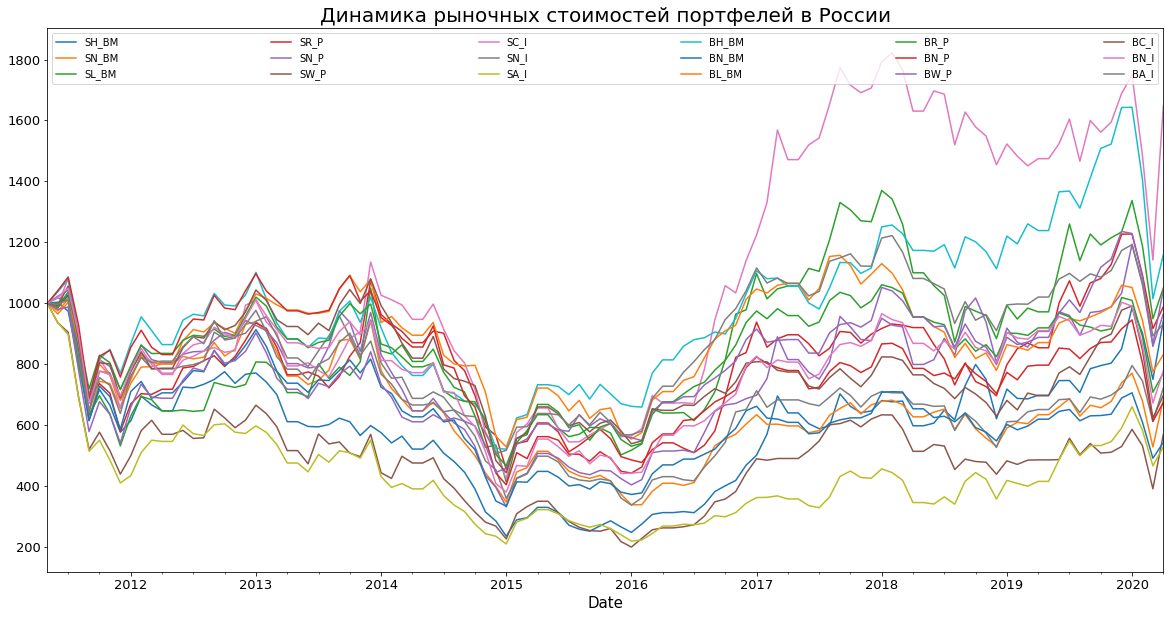

In [17]:
factors.plot(x='Date', y=['SH_BM', 'SN_BM', 'SL_BM', 'SR_P', 'SN_P', 'SW_P', 'SC_I',
       'SN_I', 'SA_I', 'BH_BM', 'BN_BM', 'BL_BM', 'BR_P', 'BN_P', 'BW_P',
       'BC_I', 'BN_I', 'BA_I'], figsize=(20, 10))
plt.legend(fontsize=20)
plt.legend(fontsize="x-large")
plt.legend(loc='upper left', mode = 'expand', ncol=6)
plt.title('Динамика рыночных стоимостей портфелей в России', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('5FF Russia.png')

In [18]:
factors['SH_BM%'] = factors['SH_BM'].pct_change() * 100
factors['SN_BM%'] = factors['SN_BM'].pct_change() * 100
factors['SL_BM%'] = factors['SL_BM'].pct_change() * 100

factors['SR_P%'] = factors['SR_P'].pct_change() * 100
factors['SN_P%'] = factors['SN_P'].pct_change() * 100
factors['SW_P%'] = factors['SW_P'].pct_change() * 100

factors['SC_I%'] = factors['SC_I'].pct_change() * 100
factors['SN_I%'] = factors['SN_I'].pct_change() * 100
factors['SA_I%'] = factors['SA_I'].pct_change() * 100

factors['BH_BM%'] = factors['BH_BM'].pct_change() * 100
factors['BN_BM%'] = factors['BN_BM'].pct_change() * 100
factors['BL_BM%'] = factors['BL_BM'].pct_change() * 100

factors['BR_P%'] = factors['BR_P'].pct_change() * 100
factors['BN_P%'] = factors['BN_P'].pct_change() * 100
factors['BW_P%'] = factors['BW_P'].pct_change() * 100

factors['BC_I%'] = factors['BC_I'].pct_change() * 100
factors['BN_I%'] = factors['BN_I'].pct_change() * 100
factors['BA_I%'] = factors['BA_I'].pct_change() * 100

factors = factors.fillna(0)

factors

,Date,SH_BM,SN_BM,SL_BM,SR_P,SN_P,SW_P,SC_I,SN_I,SA_I,...,SA_I%,BH_BM%,BN_BM%,BL_BM%,BR_P%,BN_P%,BW_P%,BC_I%,BN_I%,BA_I%
0,2011-05-31,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2011-06-30,1003.609106,965.109417,1001.368232,985.990882,1023.097330,936.146579,992.601699,1017.987023,936.836200,...,-6.316380,3.740701,-0.048816,-2.459794,-1.418680,4.116614,-1.986521,-0.735681,1.987348,-0.274096
2,2011-07-31,974.068015,1003.334639,1014.552649,1026.200798,1043.617192,904.873363,1082.579001,1009.708231,896.936533,...,-4.258980,3.955505,2.855308,3.857729,5.270854,4.334827,0.819732,6.409512,2.918479,1.369817
3,2011-08-31,804.709128,836.138794,799.213239,849.945135,880.422823,690.714332,891.502302,851.156261,690.966541,...,-22.963720,-16.596363,-18.370859,-13.953384,-14.017456,-14.583889,-21.160993,-16.701606,-14.463540,-18.359363
4,2011-09-30,616.070650,619.591394,633.508255,698.302645,641.158864,520.465588,696.777514,646.541639,514.301042,...,-25.567880,-22.374700,-26.765095,-21.610031,-19.456247,-25.723741,-25.694840,-23.590496,-25.054787,-22.013175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599314,739.314596,1234.127557,1226.750340,1033.199496,529.960892,1688.441081,723.335401,590.555514,...,8.181870,7.873865,8.321960,7.205339,11.213590,4.913668,7.934599,8.718463,8.544791,5.941378
104,2020-01-31,985.339067,770.649863,1337.334563,1227.565863,1193.854076,586.304475,1749.923595,795.827189,660.784069,...,11.891948,0.039465,2.529870,-0.709926,-0.935748,3.220370,-0.555953,1.441052,-1.245024,1.630107
105,2020-02-29,902.487451,679.449332,1187.998806,1093.074187,1060.704132,532.523192,1484.374025,745.217806,583.249904,...,-11.733661,-14.455240,-13.687496,-10.240165,-11.852199,-14.967130,-11.637580,-14.652826,-13.004655,-10.536621
106,2020-03-31,750.427454,528.333421,949.343113,917.174094,865.684737,391.203535,1142.125079,612.635549,466.604631,...,-19.999193,-27.816151,-19.375178,-17.897344,-20.418934,-23.808142,-20.959218,-26.325121,-21.975353,-16.280889


In [19]:
factors['SMB_BM'] = (factors['SH_BM%'] + factors['SN_BM%'] + factors['SL_BM%'])/3 - (factors['BH_BM%'] + factors['BN_BM%'] + factors['BL_BM%'])/3
factors['SMB_P'] = (factors['SR_P%'] + factors['SN_P%'] + factors['SW_P%'])/3 - (factors['BR_P%'] + factors['BN_P%'] + factors['BW_P%'])/3
factors['SMB_I'] = (factors['SC_I%'] + factors['SN_I%'] + factors['SA_I%'])/3 - (factors['BC_I%'] + factors['BN_I%'] + factors['BA_I%'])/3

In [20]:
factors['SMB'] = (factors['SMB_BM'] + factors['SMB_P'] + factors['SMB_I'])/3
factors['HML'] = (factors['SH_BM%'] + factors['BH_BM%'])/2 - (factors['SL_BM%'] + factors['BL_BM%'])/2
factors['RNW'] = (factors['SR_P%'] + factors['BR_P%'])/2 - (factors['SW_P%'] + factors['BW_P%'])/2
factors['CMA'] = (factors['SC_I%'] + factors['BC_I%'])/2 - (factors['SA_I%'] + factors['BA_I%'])/2

factors

,Date,SH_BM,SN_BM,SL_BM,SR_P,SN_P,SW_P,SC_I,SN_I,SA_I,...,BC_I%,BN_I%,BA_I%,SMB_BM,SMB_P,SMB_I,SMB,HML,RNW,CMA
0,2011-05-31,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2011-06-30,1003.609106,965.109417,1001.368232,985.990882,1023.097330,936.146579,992.601699,1017.987023,936.836200,...,-0.735681,1.987348,-0.274096,-1.407805,-2.062644,-2.078359,-1.849603,3.212291,2.776135,2.557483
2,2011-07-31,974.068015,1003.334639,1014.552649,1026.200798,1043.617192,904.873363,1082.579001,1009.708231,896.936533,...,6.409512,2.918479,1.369817,-2.778225,-2.560754,-2.235082,-2.524687,-2.081175,5.934939,9.181735
3,2011-08-31,804.709128,836.138794,799.213239,849.945135,880.422823,690.714332,891.502302,851.156261,690.966541,...,-16.701606,-14.463540,-18.359363,-2.118411,-2.239296,-2.264033,-2.207247,0.597660,6.817639,3.485669
4,2011-09-30,616.070650,619.591394,633.508255,698.302645,641.158864,520.465588,696.777514,646.541639,514.301042,...,-23.590496,-25.054787,-22.013175,0.225331,0.403047,-0.263783,0.121531,-1.736489,6.522681,1.074120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019-12-31,850.599314,739.314596,1234.127557,1226.750340,1033.199496,529.960892,1688.441081,723.335401,590.555514,...,8.718463,8.544791,5.941378,-2.302267,-2.347303,-1.863955,-2.171175,2.482058,4.217385,0.241142
104,2020-01-31,985.339067,770.649863,1337.334563,1227.565863,1193.854076,586.304475,1749.923595,795.827189,660.784069,...,1.441052,-1.245024,1.630107,8.860776,8.172897,7.909689,8.314454,4.113603,-5.472483,-4.219813
105,2020-02-29,902.487451,679.449332,1187.998806,1093.074187,1060.704132,532.523192,1484.374025,745.217806,583.249904,...,-14.652826,-13.004655,-10.536621,2.324519,2.391689,1.642058,2.119422,-0.728420,-0.998828,-3.778734
106,2020-03-31,750.427454,528.333421,949.343113,917.174094,865.684737,391.203535,1142.125079,612.635549,466.604631,...,-26.325121,-21.975353,-16.280889,1.969954,1.390155,1.244770,1.534960,-3.339456,5.492897,-6.550913


In [21]:
factors.to_excel('5FF Russia.xlsx')

In [22]:
# Подтягиваем рыночную премию за риск

premium = pd.read_excel('Raw_Dataset_3.xlsx',  sheet_name='Market Factor Russia', header=0)
premium['Date'] = pd.to_datetime(premium['Date'], dayfirst=True)
premium

,Date,Risk Free Rate,Market Return,Market Premium
0,2010-02-28,2.575079,-4.271921,-6.847000
1,2010-03-31,3.013554,11.456214,8.442660
2,2010-04-30,0.128430,0.022894,-0.105536
3,2010-05-31,-5.139801,-11.968795,-6.828994
4,2010-06-30,-0.948685,-3.267393,-2.318708
...,...,...,...,...
126,2020-08-31,-0.453484,1.957163,2.410646
127,2020-09-30,-5.848791,-6.363420,-0.514628
128,2020-10-31,-3.663407,-9.495889,-5.832481
129,2020-11-30,8.052676,20.192200,12.139523


In [23]:
allfactors = pd.merge(factors[['Date', 'SMB', 'HML', 'RNW', 'CMA']], premium[['Date', 'Market Premium']], how='inner', on='Date')
allfactors

,Date,SMB,HML,RNW,CMA,Market Premium
0,2011-05-31,0.000000,0.000000,0.000000,0.000000,-4.983158
1,2011-06-30,-1.849603,3.212291,2.776135,2.557483,0.386352
2,2011-07-31,-2.524687,-2.081175,5.934939,9.181735,-0.811975
3,2011-08-31,-2.207247,0.597660,6.817639,3.485669,-7.999347
4,2011-09-30,0.121531,-1.736489,6.522681,1.074120,-9.224781
...,...,...,...,...,...,...
103,2019-12-31,-2.171175,2.482058,4.217385,0.241142,2.651465
104,2020-01-31,8.314454,4.113603,-5.472483,-4.219813,-4.219011
105,2020-02-29,2.119422,-0.728420,-0.998828,-3.778734,-10.101373
106,2020-03-31,1.534960,-3.339456,5.492897,-6.550913,-4.423168


In [24]:
# построение исходного портфеля

all_p = data[['Date', 'RIC']]
all_p

,Date,RIC
0,2010,AFKS.MM
1,2011,AFKS.MM
2,2012,AFKS.MM
3,2013,AFKS.MM
4,2014,AFKS.MM
...,...,...
485,2015,VLHZ.MM
486,2016,VLHZ.MM
487,2017,VLHZ.MM
488,2018,VLHZ.MM


In [25]:
start_date = pd.to_datetime('31.05.2011', dayfirst=True)
portfolio = pd.DataFrame()

for i in range(10):
    one_year = prices[(prices['Date'] >= start_date + pd.to_timedelta(i, unit='y')) &
           (prices['Date'] < start_date + pd.to_timedelta(i+1, unit='y'))]
    
    portfolio_part = pd.merge(all_p[all_p['Date']==2010+i], one_year, how='left', on=['RIC'])
    del portfolio_part['Date_x']
    portfolio_part = portfolio_part.rename(columns={'Date_y': 'Date'})
    portfolio = portfolio.append(portfolio_part)

In [26]:
portfolio_result = build_portfolio(portfolio)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [27]:
portfolio_result['Return'] = portfolio_result['Amount'].pct_change() * 100
portfolio_result = portfolio_result.fillna(0)
portfolio_result = pd.merge(portfolio_result, premium[['Date', 'Risk Free Rate']], how='inner', on='Date')
portfolio_result['y_return'] = portfolio_result['Return'] - portfolio_result['Risk Free Rate']
portfolio_result = portfolio_result.rename(columns={'Amount': 'portfolio'})
portfolio_result

,Date,portfolio,Return,Risk Free Rate,y_return
0,2011-05-31,1000.000000,0.000000,-1.841909,1.841909
1,2011-06-30,995.592136,-0.440786,0.572559,-1.013345
2,2011-07-31,1019.141366,2.365349,3.870123,-1.504773
3,2011-08-31,843.074517,-17.275999,-5.371510,-11.904489
4,2011-09-30,643.394165,-23.684781,-11.993232,-11.691548
...,...,...,...,...,...
103,2019-12-31,1016.361837,6.785071,5.028329,1.756742
104,2020-01-31,1063.851831,4.672548,2.162740,2.509808
105,2020-02-29,939.464441,-11.692172,-4.227564,-7.464609
106,2020-03-31,744.137236,-20.791336,-17.524373,-3.266963


In [28]:
# пятифакторная модель Фамы и Френча

model = pd.merge(allfactors, portfolio_result[['Date', 'y_return']], how='inner', on='Date')
model

,Date,SMB,HML,RNW,CMA,Market Premium,y_return
0,2011-05-31,0.000000,0.000000,0.000000,0.000000,-4.983158,1.841909
1,2011-06-30,-1.849603,3.212291,2.776135,2.557483,0.386352,-1.013345
2,2011-07-31,-2.524687,-2.081175,5.934939,9.181735,-0.811975,-1.504773
3,2011-08-31,-2.207247,0.597660,6.817639,3.485669,-7.999347,-11.904489
4,2011-09-30,0.121531,-1.736489,6.522681,1.074120,-9.224781,-11.691548
...,...,...,...,...,...,...,...
103,2019-12-31,-2.171175,2.482058,4.217385,0.241142,2.651465,1.756742
104,2020-01-31,8.314454,4.113603,-5.472483,-4.219813,-4.219011,2.509808
105,2020-02-29,2.119422,-0.728420,-0.998828,-3.778734,-10.101373,-7.464609
106,2020-03-31,1.534960,-3.339456,5.492897,-6.550913,-4.423168,-3.266963


In [29]:
X = model[['Market Premium', 'SMB', 'HML', 'RNW', 'CMA']].values
X = sm.add_constant(X)
Y = np.array(model['y_return'])

FF5_OLS = sm.OLS(Y, X)
result_OLS = FF5_OLS.fit()
print(result_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     31.25
Date:                Fri, 07 May 2021   Prob (F-statistic):           3.62e-19
Time:                        17:30:20   Log-Likelihood:                -276.06
No. Observations:                 108   AIC:                             564.1
Df Residuals:                     102   BIC:                             580.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3697      0.312      1.186      0.2

In [30]:
print(model[['Market Premium', 'SMB', 'HML', 'RNW', 'CMA']].corr())

                Market Premium      SMB       HML       RNW       CMA
Market Premium        1.000000 -0.19776  0.008826 -0.143449 -0.092291
SMB                  -0.197760  1.00000 -0.047140 -0.288720  0.097500
HML                   0.008826 -0.04714  1.000000 -0.106532  0.102552
RNW                  -0.143449 -0.28872 -0.106532  1.000000  0.028076
CMA                  -0.092291  0.09750  0.102552  0.028076  1.000000


In [31]:
ols_resid = result_OLS.resid
resid_fit = sm.OLS(ols_resid[1:], sm.add_constant(ols_resid[:-1])).fit()
print(resid_fit.tvalues[1])
print(resid_fit.pvalues[1])

-0.22205179142747822
0.8247048847988382


In [32]:
rho = resid_fit.params[1]
order = toeplitz(range(len(ols_resid)))

sigma = rho**order
FF5_GLS = sm.GLS(Y, X, sigma=sigma)
result_GLS = FF5_GLS.fit()
print(result_GLS.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.607
Model:                            GLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     31.46
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.94e-19
Time:                        17:31:09   Log-Likelihood:                -276.04
No. Observations:                 108   AIC:                             564.1
Df Residuals:                     102   BIC:                             580.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3688      0.305      1.208      0.2